# Let's create a random data set with two features and three clusters

- supervised - you need to train the dataset and then test it (steps: training, validation, real-time prediction processes)
- unsupervised - you need not train it (e.g. cluster analysis)


#### Unsupervised: 
Types of cluster analysis: 
- top down (k-means)
- bottoms up (hierarchical clustering)

Both rely on the notion of similarity
- objects are similar if they share common attributes to others
- the more similar they are, the closer they are to one another
- if something is far away in similarity to one thing, it may be closer to something else
- Ultimately goal is to take large sample of data and break it up into a small number of meaningful groupings that shed insight as to what the data means

K-means clustering: 
- Needs only numeric data
- picks two random points. Goes through each dot, which one of the dots the center is closest to (distance calculation)
- assigns those dots membership (to one of the centers)



In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Creating a sample dataset with 4 clusters (make_blobs is a random number generator)
x, y = make_blobs(n_samples=400, n_features=2, centers=3, random_state=2)  #features are independent vars (x vars e.g. age, gender)
print (x[:5]) # shape locationn -> showing the data, first 5 records. each record is a tuple because of 2 features 
print (y[:5]) # cluster member -> showing labels of first 5 records


display(x)

[[ 1.55595444 -1.87562291]
 [-2.41154316 -3.72594284]
 [-2.34090099 -8.88980884]
 [-0.9048198  -3.00162072]
 [-2.33225103 -4.33905529]]
[1 2 0 2 2]
[[ 1.55595444e+00 -1.87562291e+00]
 [-2.41154316e+00 -3.72594284e+00]
 [-2.34090099e+00 -8.88980884e+00]
 [-9.04819799e-01 -3.00162072e+00]
 [-2.33225103e+00 -4.33905529e+00]
 [-5.35009388e-01 -2.55093423e+00]
 [-5.44255300e-01 -3.06054106e+00]
 [-1.73432981e+00 -8.96710465e+00]
 [-8.98235723e-01 -8.91519992e+00]
 [-1.45509880e+00 -1.09186188e+01]
 [-1.30339142e+00 -2.99300609e+00]
 [-1.08541735e+00 -1.40346829e+00]
 [-1.06047752e-01 -1.97508279e+00]
 [-2.70099563e+00 -3.98339418e+00]
 [-3.69620230e+00 -4.14467842e+00]
 [-9.20968625e-01 -8.85925495e+00]
 [ 2.63516420e+00 -9.81854441e-01]
 [ 1.78230921e+00 -2.91522595e+00]
 [-9.88972498e-01 -3.47291703e+00]
 [ 3.49504657e-01 -3.30233668e+00]
 [-4.11222325e+00 -2.00214115e+00]
 [-2.11753563e+00 -3.98311226e+00]
 [-1.31967220e+00 -9.15547193e+00]
 [-1.09969215e+00 -8.92831109e+00]
 [-2.4960048

array([[ 1.55595444e+00, -1.87562291e+00],
       [-2.41154316e+00, -3.72594284e+00],
       [-2.34090099e+00, -8.88980884e+00],
       [-9.04819799e-01, -3.00162072e+00],
       [-2.33225103e+00, -4.33905529e+00],
       [-5.35009388e-01, -2.55093423e+00],
       [-5.44255300e-01, -3.06054106e+00],
       [-1.73432981e+00, -8.96710465e+00],
       [-8.98235723e-01, -8.91519992e+00],
       [-1.45509880e+00, -1.09186188e+01],
       [-1.30339142e+00, -2.99300609e+00],
       [-1.08541735e+00, -1.40346829e+00],
       [-1.06047752e-01, -1.97508279e+00],
       [-2.70099563e+00, -3.98339418e+00],
       [-3.69620230e+00, -4.14467842e+00],
       [-9.20968625e-01, -8.85925495e+00],
       [ 2.63516420e+00, -9.81854441e-01],
       [ 1.78230921e+00, -2.91522595e+00],
       [-9.88972498e-01, -3.47291703e+00],
       [ 3.49504657e-01, -3.30233668e+00],
       [-4.11222325e+00, -2.00214115e+00],
       [-2.11753563e+00, -3.98311226e+00],
       [-1.31967220e+00, -9.15547193e+00],
       [-1.

## Plot it just to visualize it first

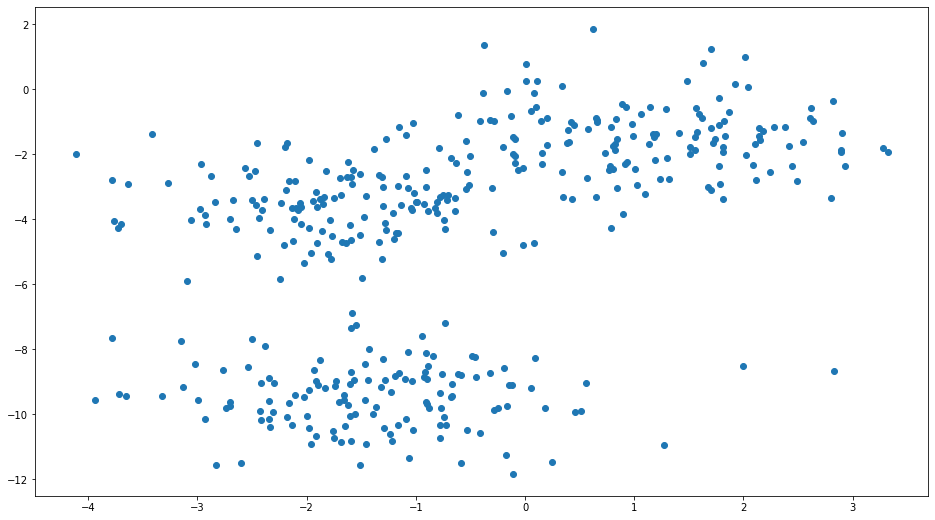

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.plot(x[:,0],x[:,1],'o')
plt.show()


## Run a cluster model

In [15]:
from sklearn import cluster
CLUSTERS = 4
k_means = cluster.KMeans(n_clusters=CLUSTERS, random_state = 12) #KMeans is not a function - but a class. 

print('labels_' in dir(k_means)) #this _ var tells python that the var is not created yet. Fit() method is responsible for generating this variable.
                                 #this is confirming if labels_ is present in k_means object or not
k_means.fit(x) #this is going thru training process
print('labels_' in dir(k_means))
print(k_means.labels_)
print(k_means.cluster_centers_)

False
True
[1 2 0 1 2 0 1 0 3 1]
[[ 5.11429335  5.46548168]
 [-2.55413067  9.13055292]
 [-5.15584949 -0.78650465]
 [-6.92009854  0.95007427]]


## Plot using the cluster analysis results

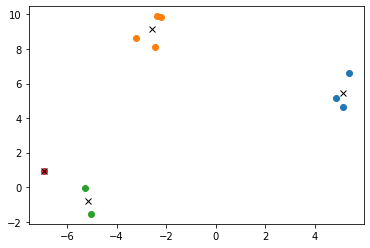

In [16]:
%matplotlib inline
def plot_cluster(model, data, clusters):
    labels = model.labels_
    centroids = model.cluster_centers_
    
    for i in range(clusters):
        ds = data[np.where(labels==i)]
        # plot the data observations
        plt.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.show()

plot_cluster(k_means, x, CLUSTERS)


## LAB 1: ## 

### Do a quick cluster analysis of the iris.csv in the Day6 folder

#### 1. Load iris.csv into a pandas DataFrame and select only the sepal length and width features
#### 2. K-Means only takes a numpy array so to turn the DataFrame into an array use the .values property
#### 3.	Use the helper function above to plot the cluster

<br>
<details><summary>Click for <b>hint</b></summary>
<p>
For the read_csv use header = 0 to read the column names
<br>
Take a look at the column names so you can figure out how to select just the sepal length and width
<br>
Make sure to get the data into a numpy format by using .values property at the end of the DataFrame to make it into a numpy array
<br>
Create and empty cluster model with 3 centers and train it
<br>
Pass the trained model and data into the plot_cluster helper function
<br>
<br>
</p>
</details>


<details><summary>Click for <b>code</b></summary>
<p>

```python
import pandas as pd
iris = pd.read_csv('iris.csv', header=0)
#print(iris.columns, iris.count())
iris2 = iris.loc[:,['sepal.length', 'sepal.width']].values
#display(iris2)

irisCluster = cluster.KMeans(n_clusters=3)
irisCluster.fit(iris2)
# print('labels_' in dir(k_means))
# print(irisCluster.labels_, irisCluster.cluster_centers_)

plot_cluster(irisCluster, iris2, 3)
```
</p>
</details>

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object') sepal.length    150
sepal.width     150
petal.length    150
petal.width     150
variety         150
dtype: int64


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

[1 3 3 3 1 1 3 1 3 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 1 1 1 3 3 1
 1 3 1 1 3 3 1 1 3 1 3 1 1 0 0 0 2 0 2 0 3 0 3 3 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 3 2 2 2 2 3 2 0 2 0 2 0 0 3 0 0 0 0
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2] [[6.85348837 3.1       ]
 [5.1875     3.6375    ]
 [5.90980392 2.73529412]
 [4.76666667 2.89166667]]


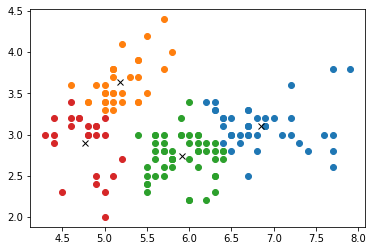

In [28]:
import pandas as pd
iris = pd.read_csv('iris.csv', header=0)
print(iris.columns, iris.count())
iris2 = iris.loc[:,['sepal.length', 'sepal.width']].values
display(iris2)

irisCluster = cluster.KMeans(n_clusters=4)
irisCluster.fit(iris2)
# print('labels_' in dir(k_means))
print(irisCluster.labels_, irisCluster.cluster_centers_)

plot_cluster(irisCluster, iris2, 4)

## Use the elbow chart to help figure out how many clusters you should use

score - how far apart from those dots are from the center points
score will give you a numeric value of how good the clustering job did

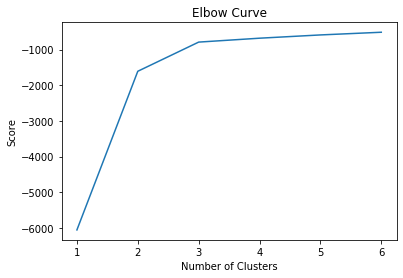

In [29]:
def plot_elbow(data, cluster_cnt = 6):
   CLUSTERS = range(1, cluster_cnt + 1)
   kmeans = [cluster.KMeans(n_clusters=i) for i in CLUSTERS]

   score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
   #print(score)
   plt.plot(CLUSTERS ,score)
   plt.xlabel('Number of Clusters')
   plt.ylabel('Score')
   plt.title('Elbow Curve')
   plt.xticks(np.arange(1, cluster_cnt + 1, 1))
   plt.show()

plot_elbow(x)

- At 1 cluster --> error rate is 9000
- At 2 cluster --> error rate is 100
- At 3 cluster --> error rate is 50 (not significant improvement)

So not much marginal improvement beyond 3 clusters
Hence optimal clusters = 3

For n_clusters = 2 The average silhouette_score is : 0.6490454382315733
For n_clusters = 3 The average silhouette_score is : 0.5788796696218448
For n_clusters = 4 The average silhouette_score is : 0.5124156653777855
For n_clusters = 5 The average silhouette_score is : 0.3846606583949159
For n_clusters = 6 The average silhouette_score is : 0.32497653529190734


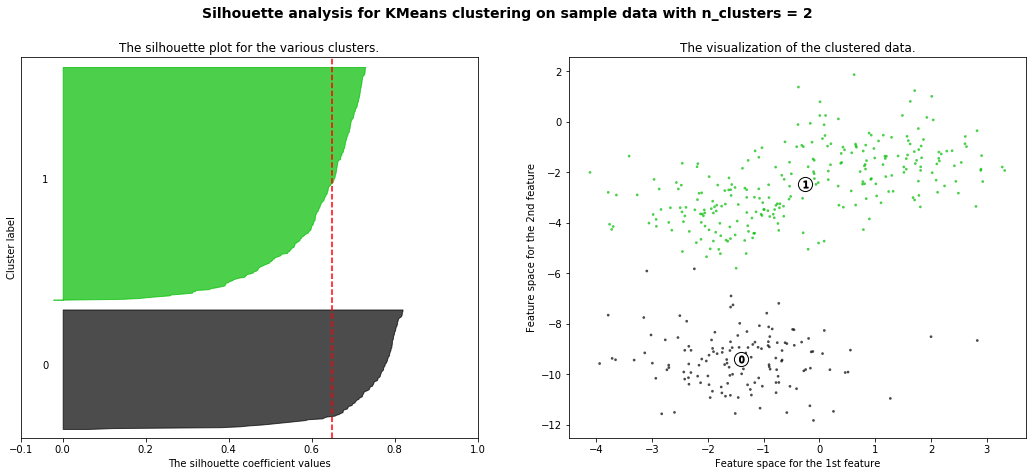

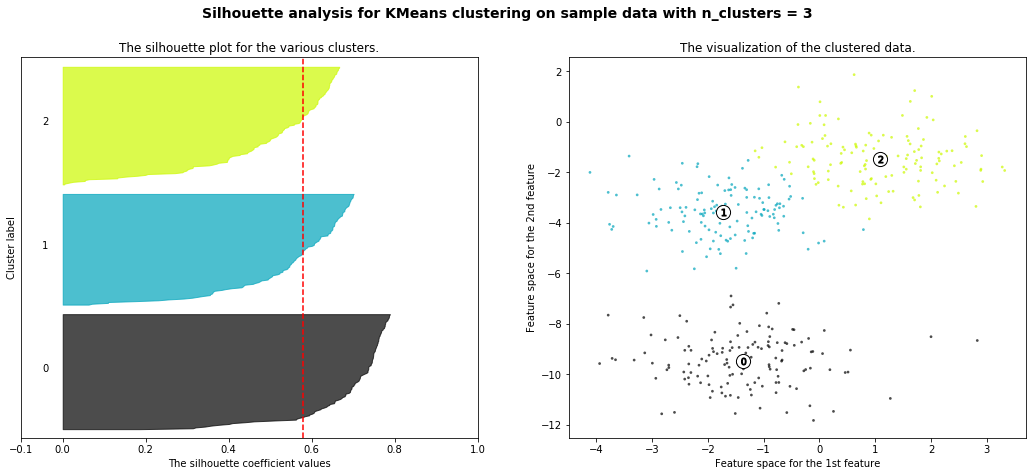

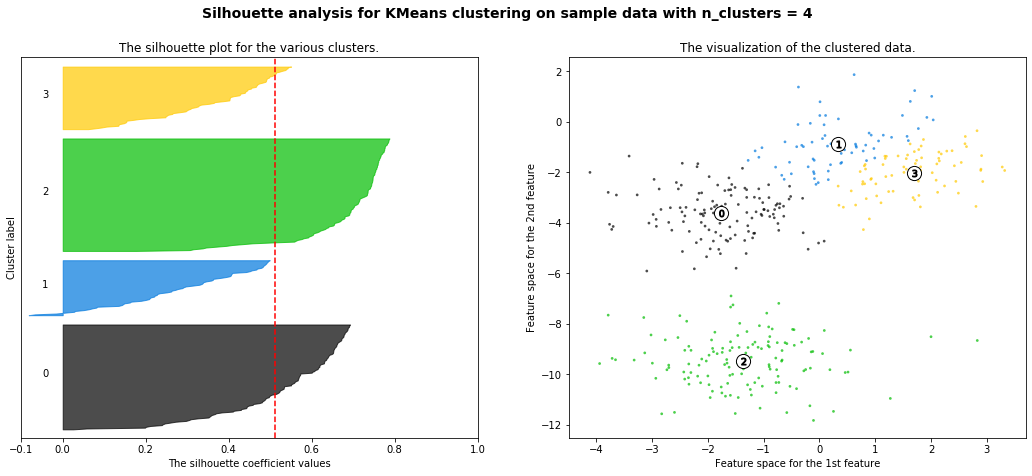

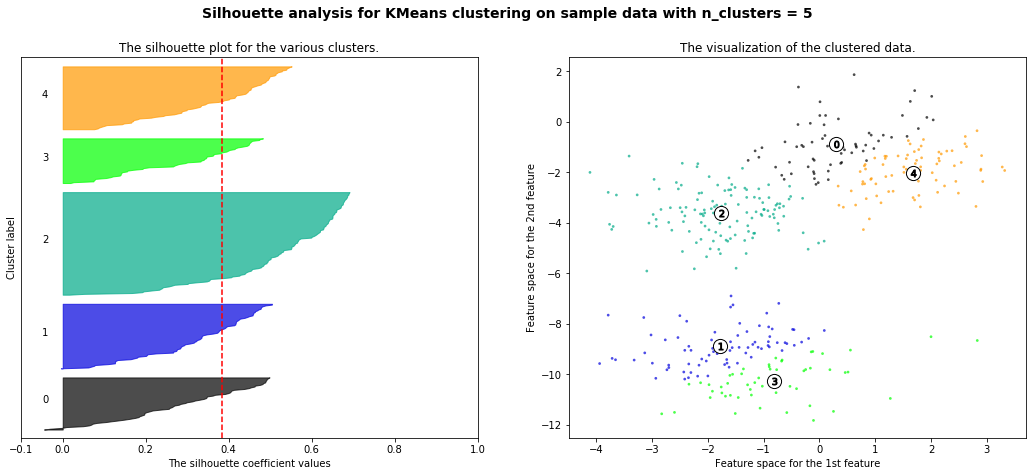

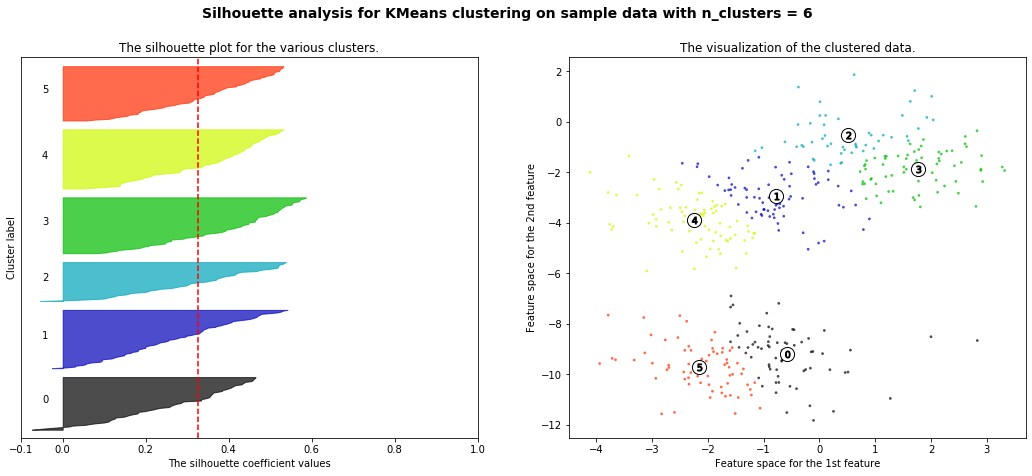

In [30]:
%matplotlib inline

def silhouette_plot(data, count = 6):
   from sklearn.datasets import make_blobs
   from sklearn.cluster import KMeans
   from sklearn.metrics import silhouette_samples, silhouette_score

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
#X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)  # For reproducibility

   range_n_clusters = range(2, count + 1)

   for n_clusters in range_n_clusters:
       # Create a subplot with 1 row and 2 columns
       fig, (ax1, ax2) = plt.subplots(1, 2)
       fig.set_size_inches(18, 7)

       # The 1st subplot is the silhouette plot
       # The silhouette coefficient can range from -1, 1 but in this example all
       # lie within [-0.1, 1]
       ax1.set_xlim([-0.1, 1])
       # The (n_clusters+1)*10 is for inserting blank space between silhouette
       # plots of individual clusters, to demarcate them clearly.
       ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

       # Initialize the clusterer with n_clusters value and a random generator
       # seed of 10 for reproducibility.
       clusterer = KMeans(n_clusters=n_clusters, random_state=10)
       cluster_labels = clusterer.fit_predict(data)

       # The silhouette_score gives the average value for all the samples.
       # This gives a perspective into the density and separation of the formed
       # clusters
       silhouette_avg = silhouette_score(data, cluster_labels)
       print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

       # Compute the silhouette scores for each sample
       sample_silhouette_values = silhouette_samples(data, cluster_labels)

       y_lower = 10
       for i in range(n_clusters):
           # Aggregate the silhouette scores for samples belonging to
           # cluster i, and sort them
           ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

           ith_cluster_silhouette_values.sort()

           size_cluster_i = ith_cluster_silhouette_values.shape[0]
           y_upper = y_lower + size_cluster_i

           color = cm.nipy_spectral(float(i) / n_clusters)
           ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

           # Label the silhouette plots with their cluster numbers at the middle
           ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

           # Compute the new y_lower for next plot
           y_lower = y_upper + 10  # 10 for the 0 samples

       ax1.set_title("The silhouette plot for the various clusters.")
       ax1.set_xlabel("The silhouette coefficient values")
       ax1.set_ylabel("Cluster label")

       # The vertical line for average silhouette score of all the values
       ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

       ax1.set_yticks([])  # Clear the yaxis labels / ticks
       ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

       # 2nd Plot showing the actual clusters formed
       colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
       ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

       # Labeling the clusters
       centers = clusterer.cluster_centers_
       # Draw white circles at cluster centers
       ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

       for i, c in enumerate(centers):
           ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

       ax2.set_title("The visualization of the clustered data.")
       ax2.set_xlabel("Feature space for the 1st feature")
       ax2.set_ylabel("Feature space for the 2nd feature")

       plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

   plt.show()

silhouette_plot(x, 6)


### Example with 3 features

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
x2, y2 = make_blobs(n_samples=400, n_features=3, centers=4, random_state=1)
print (x2) # shape location
print (y2) # cluster member


[[ -2.03484486   3.76775946  -9.57421815]
 [  0.65989053  -3.89340771   3.63476547]
 [ -4.06334004  -7.05633324  -8.32142694]
 ...
 [ -1.66145139   3.00986944 -10.85902886]
 [  1.3629532   -0.44093102   5.29885464]
 [ -0.42339588   6.03414062  -9.65970081]]
[0 3 1 1 3 3 1 1 3 0 3 2 0 0 2 1 1 0 3 0 3 1 3 3 1 3 3 2 0 1 2 3 0 0 2 0 0
 1 1 3 0 1 2 2 1 2 3 3 3 0 0 1 2 1 0 2 2 2 1 0 1 2 1 3 1 2 2 1 2 0 1 3 1 2
 1 3 2 0 0 2 2 2 3 3 0 1 3 3 2 0 1 3 0 2 1 1 3 1 2 3 0 2 2 3 0 1 0 1 3 0 3
 3 1 3 0 0 1 3 1 2 0 2 2 0 0 2 0 3 2 0 0 3 2 2 3 0 3 2 0 2 1 3 1 2 1 2 2 2
 0 3 0 0 1 1 3 3 1 3 1 3 0 2 1 2 2 0 2 0 2 1 3 2 3 0 3 0 3 2 1 0 1 0 0 0 2
 1 3 1 3 2 2 0 0 0 2 1 1 0 0 0 2 0 1 0 1 0 3 1 1 0 3 0 3 2 0 0 0 1 3 1 1 0
 0 1 0 2 1 2 2 0 1 0 3 1 2 3 2 3 3 2 0 0 2 3 2 3 1 0 2 3 2 1 2 3 0 3 1 2 1
 0 3 3 3 0 3 3 3 0 1 2 2 0 1 1 1 2 0 2 3 2 2 1 3 3 0 0 1 0 2 3 3 2 2 1 0 1
 3 1 1 3 1 2 2 2 3 3 0 3 3 1 2 0 0 3 3 2 2 3 1 2 2 3 2 2 3 2 2 3 1 1 1 2 2
 3 3 3 3 1 0 0 2 2 0 0 0 2 2 0 0 1 3 1 3 3 1 2 2 1 1 2 3 1 1 3 3 1 

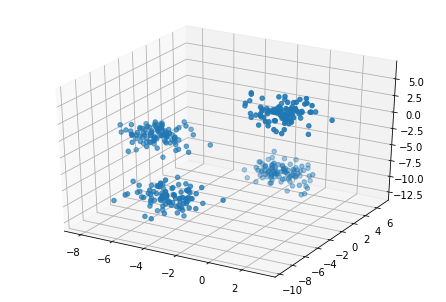

In [34]:
%matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x2[:, 0], x2[:, 1], x2[:, 2])


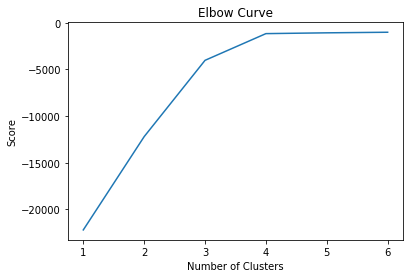

In [35]:
plot_elbow(x2)

[[-6.30256027 -3.06021544 -2.06036204]
 [-1.50478234  4.41344127 -9.9303683 ]
 [ 0.76269505 -1.63569479  3.70887057]
 [-3.9266023  -7.10860427 -7.99957451]]


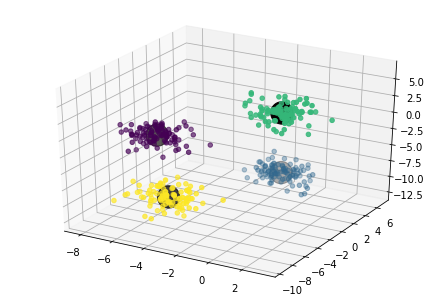

In [39]:
%matplotlib inline
CLUSTERS = 4
kmeans = cluster.KMeans(n_clusters=CLUSTERS)
kmeans = kmeans.fit(x2) #fit method trains it
labels = kmeans.predict(x2) #predict() works on fitted method
C = kmeans.cluster_centers_
print(C)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x2[:, 0], x2[:, 1], x2[:, 2], c=labels)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c='#050101', s=500)



For n_clusters = 2 The average silhouette_score is : 0.5156417733186869
For n_clusters = 3 The average silhouette_score is : 0.6669206816057474
For n_clusters = 4 The average silhouette_score is : 0.748403744856308
For n_clusters = 5 The average silhouette_score is : 0.6300003699139728
For n_clusters = 6 The average silhouette_score is : 0.5118100078588974


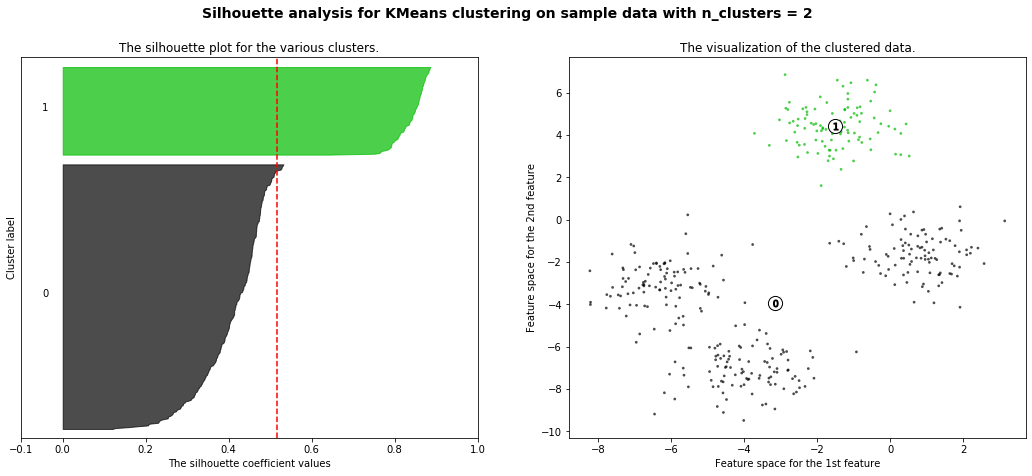

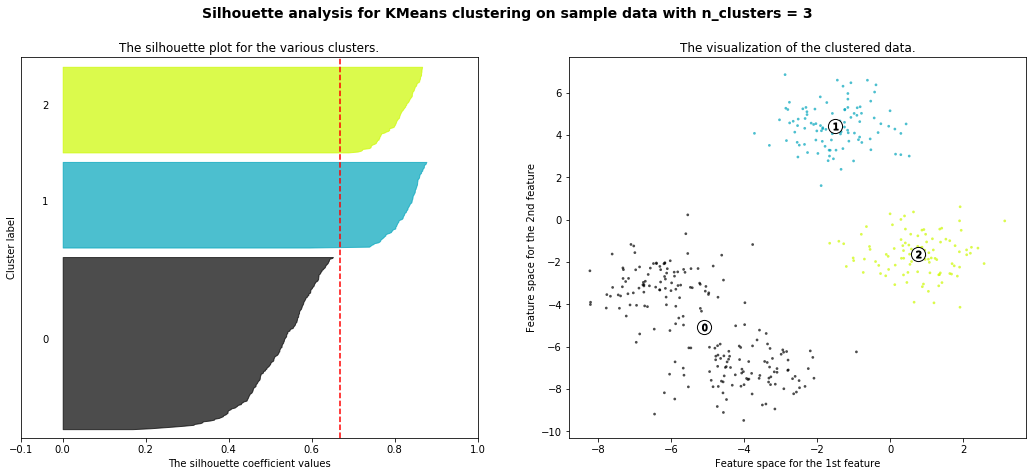

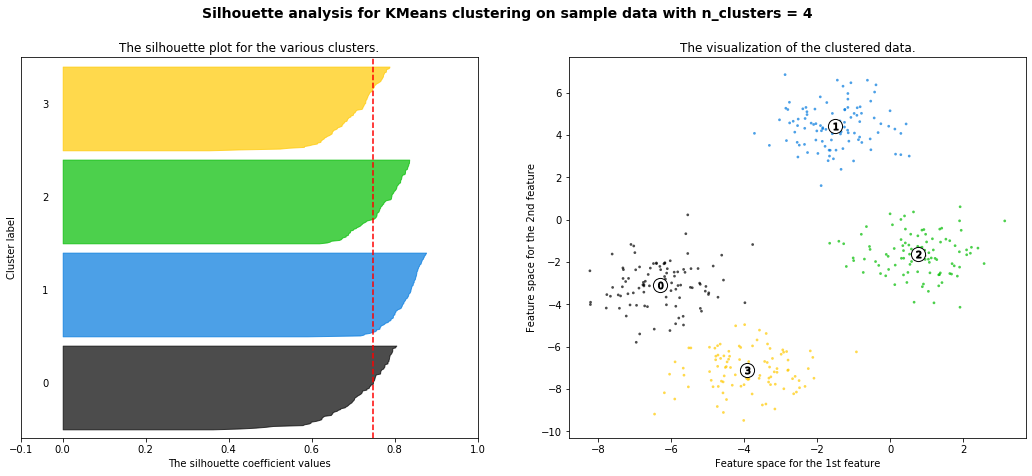

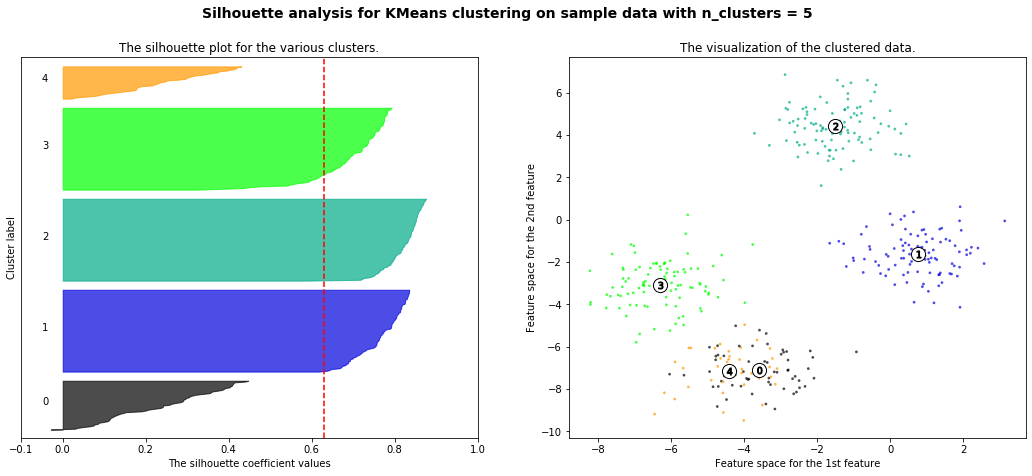

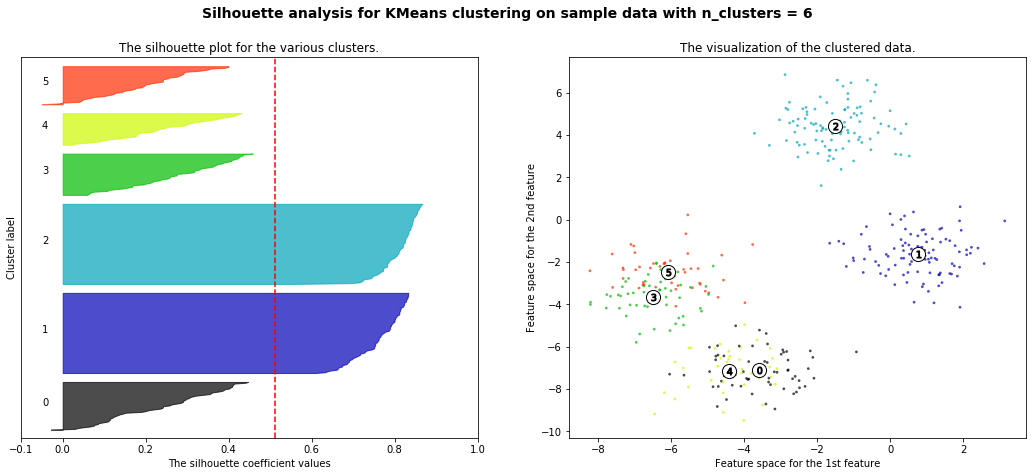

In [40]:
silhouette_plot(x2, 6)

## Hierarchical clustering - Bottoms up clustering

#### uses scipy

##### DENDOGRAM
Height of the lines - indicate how close they are to one another
- the lower the height, the closer the points are
- 

[[-2.43688506  8.09043678]
 [-5.26115909 -0.02193732]
 [ 4.84248678  5.18600965]
 [-3.21578869  8.66028624]
 [-5.05053988 -1.55107199]
 [ 5.35515486  6.59064517]
 [-2.37114948  9.89490704]
 [ 5.14523842  4.61979021]
 [-6.92009854  0.95007427]
 [-2.19269945  9.87658162]]
[0 1 2 0 1 2 0 2 1 0]


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [42.5, 42.5, 80.0, 80.0],
  [12.5, 12.5, 61.25, 61.25]],
 'dcoord': [[0.0, 1.5435716021441745, 1.5435716021441745, 0.0],
  [0.0, 2.8585033521258114, 2.8585033521258114, 1.5435716021441745],
  [0.0, 0.6420771026480533, 0.6420771026480533, 0.0],
  [0.0, 1.9929930824239357, 1.9929930824239357, 0.6420771026480533],
  [0.0, 0.17938850094276637, 0.17938850094276637, 0.0],
  [0.0, 0.9651006532022083, 0.9651006532022083, 0.0],
  [0.17938850094276637,
   2.2705246627162774,
   2.2705246627162774,
   0.9651006532022083],
  [1.9929930824239357,
   15.73757733404264,
   15.73757733404264,
   2.2705246627162774],
  [2.8585033521258114,
   20.72574834745759,
   20.72574834745759,
   15.73757733404264]],
 'ivl': ['8', '1', '4', '5', '2', '7', '6', '9', '0', '3'],
 'leaves': [8, 1, 4, 5, 2, 7, 6, 9,

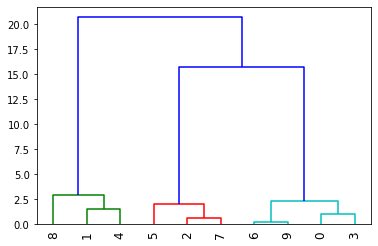

In [10]:
%matplotlib inline
x, y = make_blobs(n_samples=10, n_features=2, centers=3)
print (x)
print (y)

from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(x, 'ward')
dendrogram(z, leaf_rotation = 90, leaf_font_size=12)

## PCA
sklearn PCA 
Unsupervised model
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

PCA significance:
- Helps in reducing the dataset size
- reducing correlation between things
- normalize dataset -- speed up subsequent queries
- not always necessary
- PCA itself does take some time into itself

In [11]:
import pandas as pd
from sklearn import decomposition
from sklearn import datasets

# np.random.seed(5)

# centers = [[1, 1], [-1, -1], [1, -1]]
iris = pd.read_csv('iris.csv', header=0)

display(iris)
iris2 = iris.drop('variety', axis=1)
# X = iris2.data
# y = iris2.target

# fig = plt.figure(1, figsize=(4, 3))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(iris2)
X = pca.transform(iris2)

display(X)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239